In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My Drive/final-project/collab

/content/gdrive/My Drive/final-project/collab/new


In [3]:
%%capture
!pip install transformers
import torch
import pandas as pd
from util import train, predict_model, show_preds
from format_data import procedure, initial_model, loss_func
from constants import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)

'Tesla T4'

In [5]:
path = data_path/"dataset.csv"
MAX_LEN = 512
batch_size = 32
learning_rate = 2e-5
epochs = 4

In [ ]:
# uncomment for data pre-process
# procedure(path, MAX_LEN, batch_size)

Number of training rows: 94,471

legit    0.554879
spam     0.445121
Name: tag, dtype: float64

Drop 680 row with null value

Number of remain rows: 93,791

Clean data        ...Number of remain rows: 93,723

 Elapsed time: 133.452
Split data        ... Elapsed time: 0.049
Load Tokenizer    ...



Tokenize          ... Elapsed time: 46.251
Create DataLoader ... Elapsed time: 4.294
Save DataLoader   ... Elapsed time: 2.900


In [6]:
train_dataloader = torch.load(data_path/train_loader_file)
val_dataloader = torch.load(data_path/val_loader_file)
test_dataloader = torch.load(data_path/test_loader_file)

labels = pd.read_pickle(data_path/test_label_file)
test_labels = torch.tensor(labels.tolist())
train_labels = pd.read_pickle(data_path/train_label_file)

In [10]:
model, optimizer = initial_model(device, learning_rate)
cross_entropy = loss_func(device, train_labels)

 Elapsed time: 2.916


In [11]:
# start traininghh
train(device, model, optimizer, cross_entropy, epochs, train_dataloader, val_dataloader)


 Epoch 1 / 4

Training...
  Batch    50  of  2,051.  Timer: 54.337
  Batch   100  of  2,051.  Timer: 56.399
  Batch   150  of  2,051.  Timer: 58.260
  Batch   200  of  2,051.  Timer: 60.412
  Batch   250  of  2,051.  Timer: 61.116
  Batch   300  of  2,051.  Timer: 61.544
  Batch   350  of  2,051.  Timer: 61.851
  Batch   400  of  2,051.  Timer: 61.807
  Batch   450  of  2,051.  Timer: 61.688
  Batch   500  of  2,051.  Timer: 61.642
  Batch   550  of  2,051.  Timer: 61.582
  Batch   600  of  2,051.  Timer: 61.562
  Batch   650  of  2,051.  Timer: 61.689
  Batch   700  of  2,051.  Timer: 61.577
  Batch   750  of  2,051.  Timer: 61.722
  Batch   800  of  2,051.  Timer: 61.686
  Batch   850  of  2,051.  Timer: 61.687
  Batch   900  of  2,051.  Timer: 61.660
  Batch   950  of  2,051.  Timer: 61.770
  Batch 1,000  of  2,051.  Timer: 61.305
  Batch 1,050  of  2,051.  Timer: 61.763
  Batch 1,100  of  2,051.  Timer: 61.884
  Batch 1,150  of  2,051.  Timer: 61.679
  Batch 1,200  of  2,051.  Tim

In [12]:
model.load_state_dict(torch.load(data_path/weight_file))

<All keys matched successfully>


Predicting...
  Batch    50  of    440.  Time: 58.602
  Batch   100  of    440.  Time: 58.983
  Batch   150  of    440.  Time: 59.608
  Batch   200  of    440.  Time: 59.353
  Batch   250  of    440.  Time: 59.115
  Batch   300  of    440.  Time: 59.130
  Batch   350  of    440.  Time: 59.177
  Batch   400  of    440.  Time: 59.142
Predict time: 519.639
Save Predictions  ... Elapsed time: 0.005
Accuray: 50.729%
ROC-AUC: 49.82%


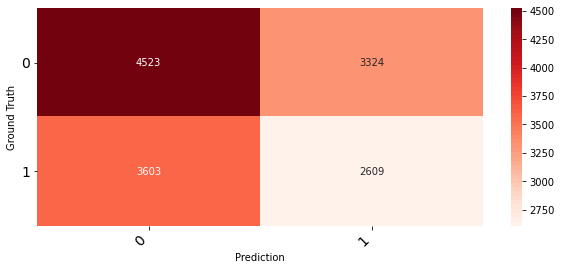

In [13]:
predicts = predict_model(device, model, test_dataloader)

preds = show_preds(predicts, test_labels)